In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime

In [3]:
dataset = pd.read_csv('FB.csv',index_col="Date",parse_dates=True)

In [4]:
dataset.head()


,Open,High,Low,Close,Volume
Date,,,,,
2012-05-18,42.049999,45.000000,38.000000,38.230000,573576400
2012-05-21,36.529999,36.660000,33.000000,34.029999,168192700
2012-05-22,32.610001,33.590000,30.940001,31.000000,101786600
2012-05-23,31.370001,32.500000,31.360001,32.000000,73600000
2012-05-24,32.950001,33.209999,31.770000,33.029999,50237200


In [5]:
dataset.isna().any()

Open      False
High      False
Low       False
Close     False
Volume    False
dtype: bool

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2109 entries, 2012-05-18 to 2020-10-05
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2109 non-null   float64
 1   High    2109 non-null   float64
 2   Low     2109 non-null   float64
 3   Close   2109 non-null   float64
 4   Volume  2109 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 98.9 KB


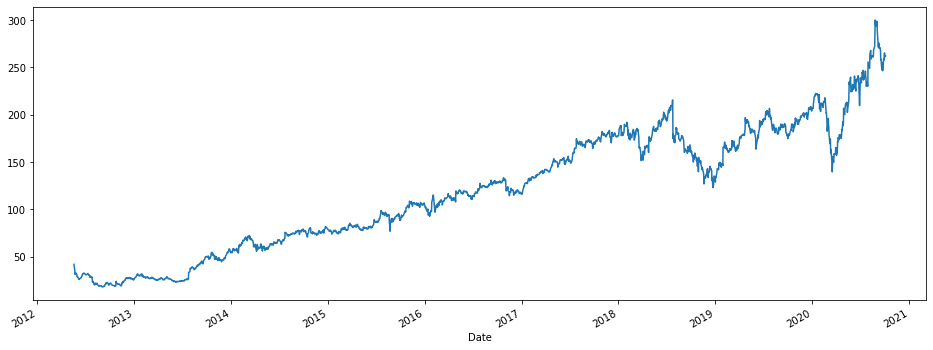

In [7]:
dataset['Open'].plot(figsize=(16,6))

In [8]:
# 7 day rolling mean
dataset.rolling(7).mean().head(20)

,Open,High,Low,Close,Volume
Date,,,,,
2012-05-18,NaN,NaN,NaN,NaN,NaN
2012-05-21,NaN,NaN,NaN,NaN,NaN
2012-05-22,NaN,NaN,NaN,NaN,NaN
2012-05-23,NaN,NaN,NaN,NaN,NaN
2012-05-24,NaN,NaN,NaN,NaN,NaN
2012-05-25,NaN,NaN,NaN,NaN,NaN
2012-05-29,34.270000,35.085714,32.118572,32.720000,1.546580e+08
2012-05-30,32.362858,32.878571,30.670000,31.285714,8.089966e+07
2012-05-31,31.222858,31.880000,29.788572,30.652857,7.282059e+07


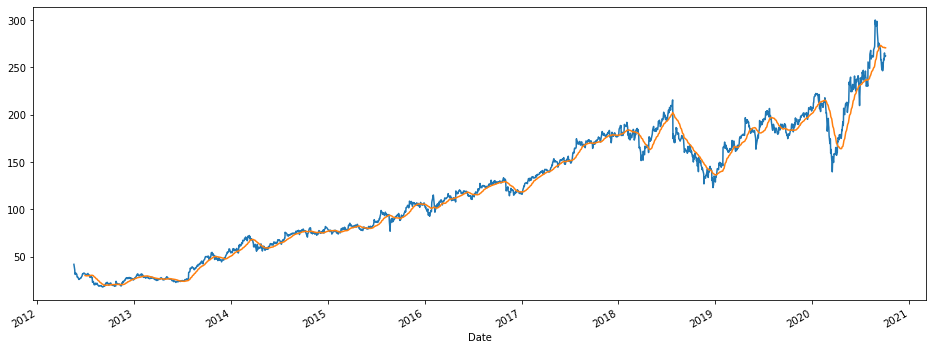

In [9]:
dataset['Open'].plot(figsize=(16,6))
dataset.rolling(window=30).mean()['Close'].plot()

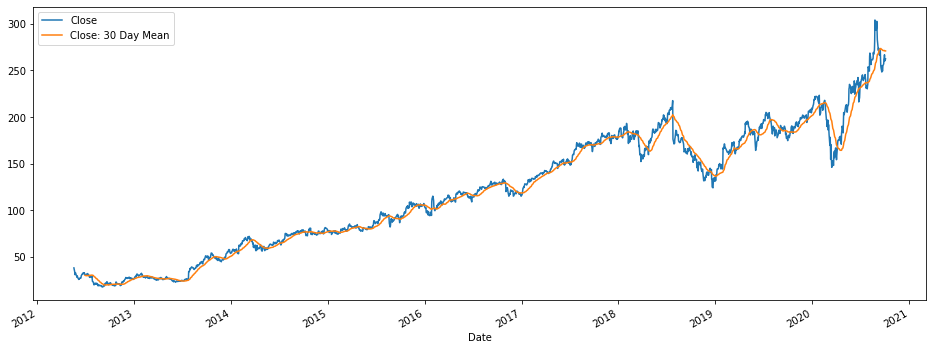

In [10]:
dataset['Close: 30 Day Mean'] = dataset['Close'].rolling(window=30).mean()
dataset[['Close','Close: 30 Day Mean']].plot(figsize=(16,6))

In [11]:
training_set=dataset['Open']
type(training_set)

pandas.core.series.Series

In [12]:
training_set= training_set[:int(len(training_set)*(4/5))]
training_set=pd.DataFrame(training_set)
type(training_set)
training_set.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1687 entries, 2012-05-18 to 2019-02-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1687 non-null   float64
dtypes: float64(1)
memory usage: 26.4 KB


In [13]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [14]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [15]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [16]:
# Initialising the RNN
regressor = Sequential()

In [17]:
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))



In [18]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1627/1627 [==============================] - 16s 10ms/step - loss: 0.0209
Epoch 2/100
1627/1627 [==============================] - 13s 8ms/step - loss: 0.0038
Epoch 3/100
1627/1627 [==============================] - 13s 8ms/step - loss: 0.0036
Epoch 4/100
1627/1627 [==============================] - 12s 8ms/step - loss: 0.0036
Epoch 5/100
1627/1627 [==============================] - 12s 8ms/step - loss: 0.0036
Epoch 6/100
1627/1627 [==============================] - 12s 8ms/step - loss: 0.0035
Epoch 7/100
1627/1627 [==============================] - 12s 8ms/step - loss: 0.0029
Epoch 8/100
1627/1627 [==============================] - 12s 8ms/step - loss: 0.0029
Epoch 9/100
1627/1627 [==============================] - 12s 8ms/step - loss: 0.0026
Epoch 10/100
1627/1627 [==============================] - 12s 8ms/step - loss: 0.0025
Epoch 11/100
1627/1627 [==============================] - 12s 8ms/step - loss: 0.0025
Epoch 12/100
1627/1627 [==============================] - 12s 

1627/1627 [==============================] - 6s 4ms/step - loss: 9.2493e-04
Epoch 97/100
1627/1627 [==============================] - 6s 4ms/step - loss: 9.4562e-04
Epoch 98/100
1627/1627 [==============================] - 6s 4ms/step - loss: 8.9864e-04
Epoch 99/100
1627/1627 [==============================] - 5s 3ms/step - loss: 9.5556e-04
Epoch 100/100
1627/1627 [==============================] - 5s 3ms/step - loss: 0.0012


In [19]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv('FB.csv',index_col="Date",parse_dates=True)



In [20]:
dataset_test= dataset['Open']
dataset_test= dataset_test[int(len(dataset_test)*4/5):]
dataset_test.head()

Date
2019-02-04    165.699997
2019-02-05    169.149994
2019-02-06    171.199997
2019-02-07    168.199997
2019-02-08    164.470001
Name: Open, dtype: float64

In [21]:
#dataset_test.values

In [22]:
real_stock_price= dataset_test[60:]

In [23]:
# Getting the predicted stock price of 2017
inputs = dataset_test.values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, len(inputs)):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

In [24]:
real_stock_price=pd.DataFrame(real_stock_price)
real_stock_price

,Open
Date,
2019-05-01,194.779999
2019-05-02,193.000000
2019-05-03,194.380005
2019-05-06,191.240005
2019-05-07,192.539993
...,...
2020-09-29,257.809998
2020-09-30,261.980011
2020-10-01,265.350006


In [25]:
predicted_stock_price=pd.DataFrame(predicted_stock_price)
predicted_stock_price.rename(columns={'0':"Open2"})
predicted_stock_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362 entries, 0 to 361
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       362 non-null    float32
dtypes: float32(1)
memory usage: 1.5 KB


In [26]:
df3= predicted_stock_price[0]
df3.values

array([187.58876, 187.46338, 186.88998, 186.58626, 186.28476, 186.30179,
       186.1652 , 185.54333, 184.92534, 183.84961, 182.46176, 180.91183,
       180.36087, 180.82503, 181.23863, 181.56883, 181.75383, 181.35541,
       180.50789, 179.47408, 178.92618, 178.91757, 178.78319, 177.56706,
       174.0389 , 170.08951, 167.33214, 166.5968 , 168.18243, 171.50993,
       174.85619, 176.32219, 176.52495, 176.82962, 178.98354, 181.10736,
       182.76291, 183.36801, 183.77658, 184.41153, 184.66911, 184.62355,
       184.66043, 185.7284 , 187.11319, 188.35347, 189.46542, 190.08212,
       190.12703, 190.71223, 192.3881 , 193.7714 , 195.0853 , 196.06364,
       196.6029 , 196.02847, 195.2298 , 194.40572, 194.4118 , 194.25197,
       195.4378 , 196.35762, 196.20268, 194.64688, 192.891  , 191.28336,
       189.71416, 187.45235, 184.96552, 183.02206, 182.5049 , 183.72923,
       185.17993, 185.602  , 184.93938, 182.93938, 180.92232, 180.04402,
       180.27484, 181.00006, 181.39221, 180.83174, 

In [27]:
real_stock_price.insert(1, 'Open2', df3.values, True)

In [28]:
real_stock_price

,Open,Open2
Date,,
2019-05-01,194.779999,187.588760
2019-05-02,193.000000,187.463379
2019-05-03,194.380005,186.889984
2019-05-06,191.240005,186.586258
2019-05-07,192.539993,186.284760
...,...,...
2020-09-29,257.809998,237.578812
2020-09-30,261.980011,239.494476
2020-10-01,265.350006,241.089706


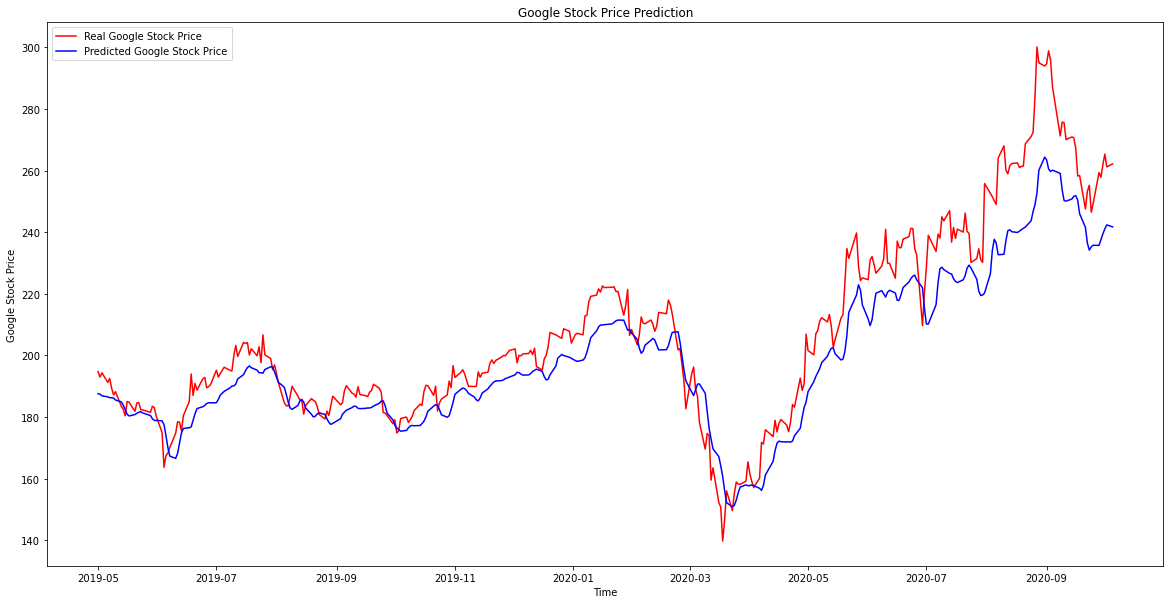

In [29]:

# Visualising the results
plt.figure(figsize=(20,10))
plt.plot(real_stock_price['Open'], color = 'red', label = 'Real Google Stock Price')
plt.plot(real_stock_price['Open2'], color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()
